![data-x](http://oi64.tinypic.com/o858n4.jpg)


# Super quick Introduction to CNNs in TensorFlow

#### Author: Alexander Fred Ojala

**Source:** Tensorflow docs + Hands on Machine Learning and TensorFlow

____

This notebook highlights what happens when we convolve input with feature layer (visualize activation map). 

Notebook ends with a CNN implmentation from scratch in TensorFlow. Shows that CNNs are tedious to build in native TensorFlow code.

In [10]:
# To support both python 2 and python 3
from __future__ import division, print_function

import warnings
warnings.filterwarnings("ignore")

# Common imports
import numpy as np
import os

# To plot pretty figures
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

In [11]:
import tensorflow as tf

# Import an image

In [13]:
from sklearn.datasets import load_sample_image
china = load_sample_image("china.jpg")
flower = load_sample_image("flower.jpg")

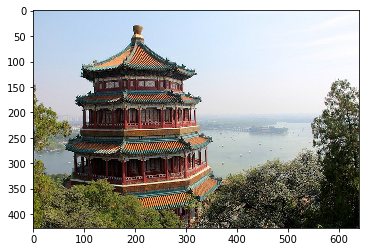

In [14]:
plt.imshow(china);

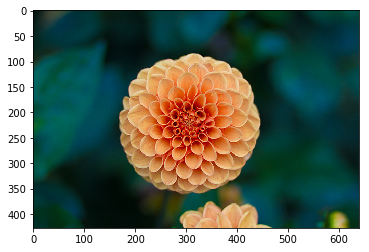

In [15]:
plt.imshow(flower);

# Make it grayscale

In [16]:
image = china[100:320,100:320]
height, width, channels = image.shape
image_grayscale = image.mean(axis=2).astype(np.float32)
images = image_grayscale.reshape(1, height, width, 1)

# Create filters

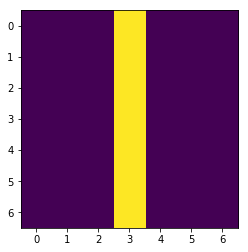

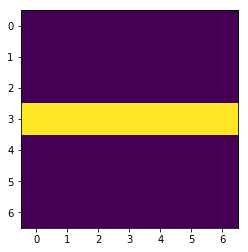

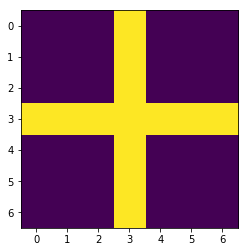

In [19]:
fmap = np.zeros(shape=(7, 7, 1, 3), dtype=np.float32)
fmap[:, 3, 0, 0] = 1
fmap[3, :, 0, 1] = 1
fmap[3, :, 0, 2] = 1
fmap[:, 3, 0, 2] = 1
plt.imshow(fmap[:, :, 0, 0])
plt.show()
plt.imshow(fmap[:, :, 0, 1])
plt.show()

plt.imshow(fmap[:, :, 0, 2])
plt.show()

# Create convolution operation

In [20]:
X = tf.placeholder(tf.float32, shape=(None, height, width, 1))
feature_maps = tf.constant(fmap)
convolution = tf.nn.conv2d(X, feature_maps, strides=[1,1,1,1], padding="SAME")

# Run the operation

In [21]:
with tf.Session() as sess:
    output = convolution.eval(feed_dict={X: images})

# Plot original image

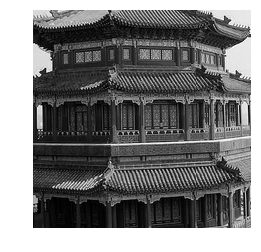

In [22]:
plt.imshow(images[0, :, :, 0],interpolation='nearest', cmap='gray')
plt.axis('off');

In [23]:
in2 = images[0, :, :, 0] # save the first image
in2 = in2.reshape(1,220,220,1)

# Vertical convolution

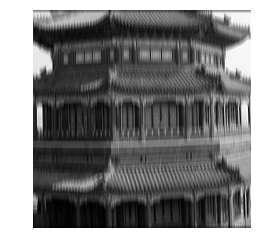

In [24]:
plt.imshow(output[0, :, :, 0],interpolation='nearest', cmap='gray')
plt.axis('off');

# Horizontal filter

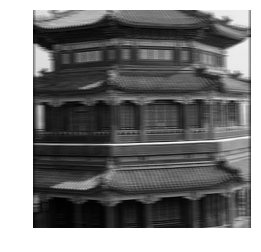

In [25]:
plt.imshow(output[0, :, :, 1],interpolation='nearest', cmap='gray')
plt.axis('off');

# Cross-filter

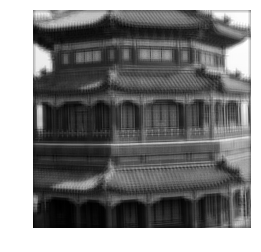

In [26]:
plt.imshow(output[0, :, :, 2],interpolation='nearest', cmap='gray')
plt.axis('off');

# Gaussian Blur

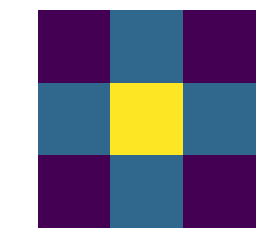

In [27]:
blur = np.array([[1,2,1],[2,4,2],[1,2,1]])
plt.imshow(blur)
plt.axis('off');
blur = tf.constant(blur,shape=[3,3,1,1],dtype=tf.float32)

X = tf.placeholder(tf.float32, shape=(None, height, width, 1))
convolution = tf.nn.conv2d(X, blur, strides=[1,1,1,1], padding="SAME")

with tf.Session() as sess:
    output = convolution.eval(feed_dict={X: in2})
    

in3 = output

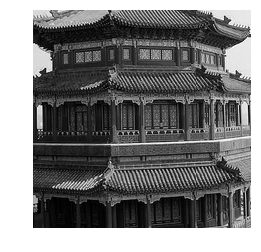

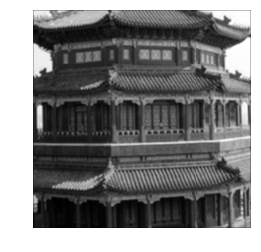

In [28]:
plt.imshow(in2[0,:,:,0],interpolation='nearest', cmap='gray')
plt.axis('off')
plt.show()
plt.imshow(output[0,:,:,0],interpolation='nearest', cmap='gray')
plt.axis('off');

### Examples of different kernels
https://en.wikipedia.org/wiki/Kernel_(image_processing)

# CNN in TensorFlow from scratch
Takes 2+hours to run on a CPU.

Source: https://github.com/adventuresinML/adventures-in-ml-code

In [ ]:
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

# Python optimisation variables
learning_rate = 0.0001
epochs = 10
batch_size = 50

# declare the training data placeholders
# input x - for 28 x 28 pixels = 784 - this is the flattened image data that is drawn from 
# mnist.train.nextbatch()
x = tf.placeholder(tf.float32, [None, 784])
# dynamically reshape the input
x_shaped = tf.reshape(x, [-1, 28, 28, 1])
# now declare the output data placeholder - 10 digits
y = tf.placeholder(tf.float32, [None, 10])

In [ ]:
def create_new_conv_layer(input_data, num_input_channels, num_filters, filter_shape, pool_shape, name):
    # setup the filter input shape for tf.nn.conv_2d
    conv_filt_shape = [filter_shape[0], filter_shape[1], num_input_channels,
                      num_filters]

    # initialise weights and bias for the filter
    weights = tf.Variable(tf.truncated_normal(conv_filt_shape, stddev=0.03),
                                      name=name+'_W')
    bias = tf.Variable(tf.truncated_normal([num_filters]), name=name+'_b')

    # setup the convolutional layer operation
    out_layer = tf.nn.conv2d(input_data, weights, strides=[1, 1, 1, 1], padding='SAME')

    # add the bias
    out_layer += bias

    # apply a ReLU non-linear activation
    out_layer = tf.nn.relu(out_layer)

    # now perform max pooling
    ksize = [1, pool_shape[0], pool_shape[1], 1]
    strides = [1, 2, 2, 1]
    out_layer = tf.nn.max_pool(out_layer, ksize=ksize, strides=strides, 
                               padding='SAME')

    return out_layer

In [ ]:
# create some convolutional layers
layer1 = create_new_conv_layer(x_shaped, 1, 32, [5, 5], [2, 2], name='layer1')
layer2 = create_new_conv_layer(layer1, 32, 64, [5, 5], [2, 2], name='layer2')

In [ ]:
flattened = tf.reshape(layer2, [-1, 7 * 7 * 64])

In [ ]:
# setup some weights and bias values for this layer, then activate with ReLU
wd1 = tf.Variable(tf.truncated_normal([7 * 7 * 64, 1000], stddev=0.03), name='wd1')
bd1 = tf.Variable(tf.truncated_normal([1000], stddev=0.01), name='bd1')
dense_layer1 = tf.matmul(flattened, wd1) + bd1
dense_layer1 = tf.nn.relu(dense_layer1)

In [ ]:
# another layer with softmax activations
wd2 = tf.Variable(tf.truncated_normal([1000, 10], stddev=0.03), name='wd2')
bd2 = tf.Variable(tf.truncated_normal([10], stddev=0.01), name='bd2')
dense_layer2 = tf.matmul(dense_layer1, wd2) + bd2
y_ = tf.nn.softmax(dense_layer2)

In [ ]:
cross_entropy = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=dense_layer2, labels=y))

In [ ]:
# add an optimiser
optimiser = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cross_entropy)

# define an accuracy assessment operation
correct_prediction = tf.equal(tf.argmax(y, 1), tf.argmax(y_, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

# setup the initialisation operator
init_op = tf.global_variables_initializer()

with tf.Session() as sess:
    # initialise the variables
    sess.run(init_op)
    total_batch = int(len(mnist.train.labels) / batch_size)
    for epoch in range(epochs):
        avg_cost = 0
        for i in range(total_batch):
            batch_x, batch_y = mnist.train.next_batch(batch_size=batch_size)
            print(i)
            _, c = sess.run([optimiser, cross_entropy], 
                            feed_dict={x: batch_x, y: batch_y})
            avg_cost += c / total_batch
        test_acc = sess.run(accuracy, 
                       feed_dict={x: mnist.test.images, y: mnist.test.labels})
        print("Epoch:", (epoch + 1), "cost =", "{:.3f}".format(avg_cost), "test accuracy: {:.3f}".format(test_acc))

    print("\nTraining complete!")
    print(sess.run(accuracy, feed_dict={x: mnist.test.images, y: mnist.test.labels}))